<a href="https://colab.research.google.com/github/gargiiiii18/colab-notebooks/blob/main/plant_disease_detection_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
import tensorflow as tf
print(tf.__version__)

2.18.0


Data Curation

In [4]:
!pip install kaggle

In [6]:
#Get your creds from Kaggle
kaggle_credentials = json.load(open("kaggle.json"))

FileNotFoundError: [Errno 2] No such file or directory: 'kaggle.json'

In [ ]:
#setup kaggle apikey environment variables
os.environ["KAGGLE_USERNAME"] = kaggle_credentials["username"]
os.environ["KAGGLE_KEY"] = kaggle_credentials["key"]

In [ ]:
#!/bin/bash
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
   # Extract all the contents of zip file in current directory
   zip_ref.extractall()

MOUNTING GOOGLE DRIVE

In [ ]:
#Store the dataset on your drive and access it directly from there

In [ ]:
#mounting gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/MyDrive/plant-disease-detection"
os.makedirs(folder_path, exist_ok=True)

NameError: name 'os' is not defined

In [ ]:
#copy data to gdrive
!cp -r "/content/plantvillage dataset" /content/drive/MyDrive/plant-disease-detection/

In [ ]:
#copy data from gdrive
!cp -r "/content/drive/MyDrive/plant-disease-detection/plantvillage dataset/color" /content/

^C


In [ ]:
!mkdir -p "/content/plantvillage dataset"
!cp -r "/content/drive/MyDrive/plant-disease-detection/plantvillage dataset/color" "/content/plantvillage dataset/"

In [ ]:
print(os.listdir("/content/drive/MyDrive/plant-disease-detection/plantvillage dataset"))

print(len(os.listdir("/content/drive/MyDrive/plant-disease-detection/plantvillage dataset/color")))
print(os.listdir("/content/drive/MyDrive/plant-disease-detection/plantvillage dataset/color")[:5])

# print(len(os.listdir("plantvillage dataset/grayscale")))
# print(os.listdir("plantvillage dataset/grayscale")[:5])

# print(len(os.listdir("plantvillage dataset/segmented")))
# print(os.listdir("plantvillage dataset/segmented")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [ ]:
print(len(os.listdir("/content/drive/MyDrive/plant-disease-detection/plantvillage dataset/color/Grape___healthy")))
print(os.listdir("/content/drive/MyDrive/plant-disease-detection/plantvillage dataset/color/Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


Data Preprocessing

In [ ]:
#base directory
base_dir = "/content/drive/MyDrive/plant-disease-detection/plantvillage dataset/color"

[[[176 172 171]
  [177 173 172]
  [178 174 173]
  ...
  [ 81  76  73]
  [ 79  74  71]
  [ 80  75  72]]

 [[180 176 175]
  [181 177 176]
  [181 177 176]
  ...
  [ 70  65  62]
  [ 75  70  67]
  [ 81  76  73]]

 [[180 176 175]
  [181 177 176]
  [181 177 176]
  ...
  [ 75  70  67]
  [ 73  68  65]
  [ 76  71  68]]

 ...

 [[122 116 116]
  [121 115 115]
  [121 115 115]
  ...
  [ 58  54  43]
  [ 58  54  43]
  [ 57  53  42]]

 [[124 118 118]
  [122 116 116]
  [120 114 114]
  ...
  [ 55  51  40]
  [ 53  49  38]
  [ 50  46  35]]

 [[125 119 119]
  [123 117 117]
  [120 114 114]
  ...
  [ 57  53  42]
  [ 56  52  41]
  [ 54  50  39]]]
(256, 256, 3)


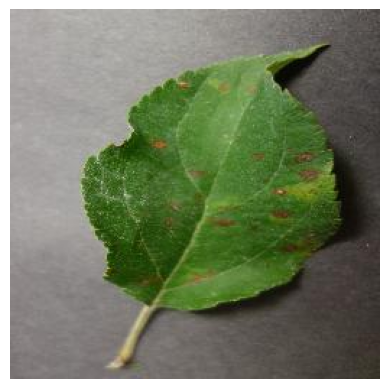

In [ ]:
image_path = "/content/drive/MyDrive/plant-disease-detection/plantvillage dataset/color/Apple___Cedar_apple_rust/0321e067-d13b-47d0-b3a6-76ba6f357d02___FREC_C.Rust 3667.JPG"

#read image
img = mpimg.imread(image_path)
print(img)
print(img.shape)
#plot image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#image parameters
img_size=224
batch_size=32

Train Test Split

In [ ]:
#Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
#Train Generator
train_gen = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
#Validation Generator
val_gen = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


Convolutional Neural Network

In [ ]:
#Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_gen.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Complie the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model Training

In [ ]:
#Training the Model
history = model.fit(
    train_gen,
    steps_per_epoch = train_gen.samples // batch_size,
    epochs = 5,
    validation_data = val_gen,
    validation_steps = val_gen.samples // batch_size
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 117s 81ms/step - accuracy: 0.6051 - loss: 1.6181 - val_accuracy: 0.8617 - val_loss: 0.4470
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 140s 84ms/step - accuracy: 0.9193 - loss: 0.2510 - val_accuracy: 0.8831 - val_loss: 0.3761
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 102s 75ms/step - accuracy: 0.9690 - loss: 0.0997 - val_accuracy: 0.8732 - val_loss: 0.5063
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 141s 104ms/step - accuracy: 0.9788 - loss: 0.0656 - val_accuracy: 0.8612 - val_loss: 0.5720
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 111s 82ms/step - accuracy: 0.9800 - loss: 0.0599 - val_accuracy: 0.8666 - val_loss: 0.5651


Model Eval

In [ ]:
#Model Evaluation
print('Evaluating model...')
val_loss, val_accuracy = model.evaluate(val_gen, steps=val_gen.samples//batch_size)
print(f'Validation accuracy: {val_accuracy*100:.2f}%')

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8660 - loss: 0.5743
Validation accuracy: 86.67%


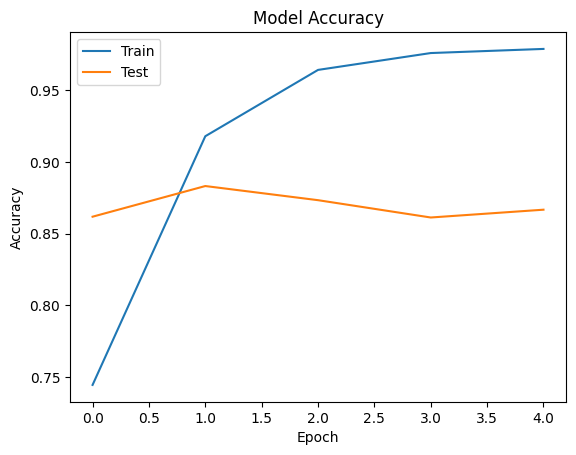

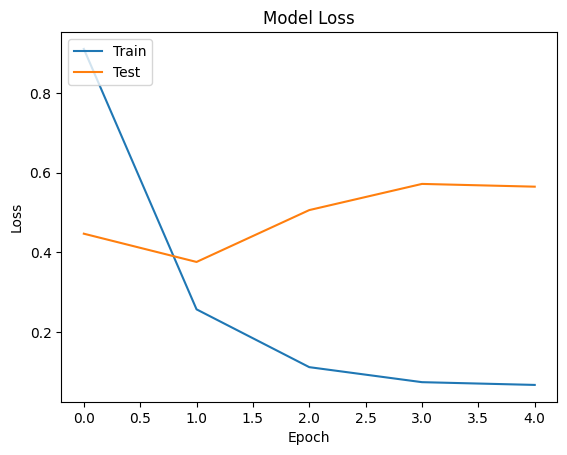

In [ ]:
#Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Building a Predictive System

In [ ]:
#function to load & preprocess image using pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32')/255
    return img_array

 #function to predict the class of the image
def predict_image_class(model, image_path, class_indices):
    preprocessed_image = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
#Creating a mapping from class index to class name
class_indices = {v: k for k, v in train_gen.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
#saving class names as json files
json.dump(class_indices, open("class_indices.json", "w"))

In [ ]:
#Example Usage
image_path="/content/test_apple_black_rot.jpeg"
# image_path="/content/test_blueberry_healthy.jpg"
# image_path="/content/test_potato_early_blight.jpg"

predicted_class_name = predict_image_class(model, image_path, class_indices)

#Output the result class name
print(f"The predicted class is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
The predicted class is: Apple___Black_rot


Saving the Model to G Drive

In [ ]:
import os

save_dir = "/content/drive/MyDrive/plant-disease-detection/models"
os.makedirs(save_dir, exist_ok=True)

In [ ]:
model.save(os.path.join(save_dir, "model.h5"))

Reloading model and other things

In [ ]:
from tensorflow.keras.models import load_model

# Replace with the path where your model is saved
model = load_model('/content/drive/MyDrive/plant-disease-detection/models/model.h5')

In [ ]:
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

In [ ]:
#Converting class_indices from json format to key as int fomat
#rerun train_gen model definition

#Creating a mapping from class index to class name
class_indices = {v: k for k, v in train_gen.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '